In [1]:
import numpy as np
import sympy as smp
from sympy import *
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

# 1st Year Calculus

In [2]:
x, y = smp.symbols('x y') # x and y are the variables

In [3]:
f = x**2+y

In [4]:
f.subs(x, 4)

y + 16

In [5]:
smp.sin(x)

sin(x)

In [6]:
smp.log(x, 10) # log base 10

log(x)/log(10)

In [7]:
# x**(3/2)
x**(smp.Rational(3, 2)) # Rational is used to represent fractions

x**(3/2)

## Limits

$$\lim_{x \to \pi} \sin(x/2 + \sin(x)) $$

In [8]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi) # limit of the function

1

$$\lim_{x \to 0^+} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [9]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x) + 1), x, 0, dir="+")

2

$$\lim_{x \to 0^-} \frac{2e^{1/x}}{e^{1/x}+1} $$

In [10]:
smp.limit(2*smp.exp(1/x) / (smp.exp(1/x) + 1), x, 0, dir="-")

0

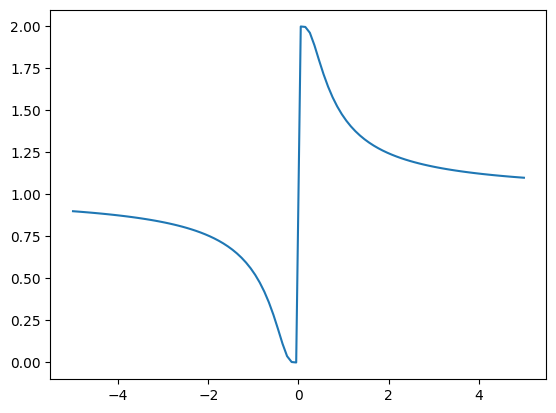

In [11]:
expr = 2*smp.exp(1/x) / (smp.exp(1/x) + 1)
expr_f = smp.lambdify(x, expr)
x_num = np.linspace(-5, 5, 100)
plt.plot(x_num, expr_f(x_num))

$$\lim_{x \to \infty} \frac{\cos(x)-1}{x} $$

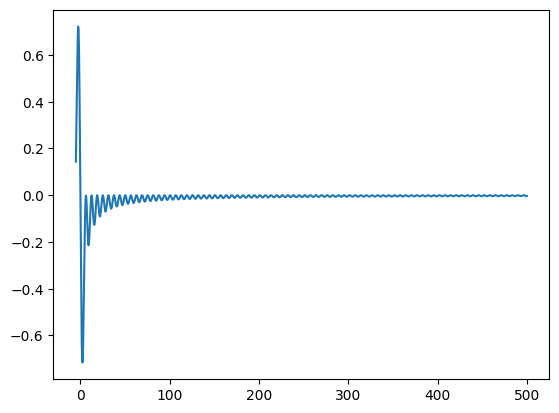

In [12]:
x_num = np.linspace(-5, 500, 1000)
expr_f = lambdify(x, (smp.cos(x) - 1)/x)
plt.plot(x_num, expr_f(x_num))

In [13]:
smp.limit((smp.cos(x) - 1)/x, x, smp.oo)

0

## Derivatives

$$ \frac{d}{dx} \left( \frac{1 + \sin{x}}{1 - \cos{x}} \right)^2 $$

In [14]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} (log_5(x))^{x/2} $$

In [15]:
smp.diff(smp.log(x, 5)**(x/2))

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

$$
\frac{d}{dx} f(x + g(x))
$$

In [16]:
f, g, = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(g)

In [17]:
f

f(g(x))

In [18]:
smp.diff(f, g)

Derivative(f(g(x)), g(x))

In [19]:
smp.diff(f, x)

Derivative(f(g(x)), g(x))*Derivative(g(x), x)

In [20]:
f, g, = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)

In [21]:
f

f(x + g(x))

In [22]:
smp.diff(f, x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## Basic Antiderivatives
$$
\int \csc(x)\cot(x) \,dx
$$



In [23]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

$$
\int 4\sec(3x)\tan(3x) \,dx
$$

In [24]:
smp.integrate(4*smp.sec(3*x)*smp.tan(3*x), x)

4/(3*cos(3*x))

$$
\int \left( \frac{2}{\sqrt{1-x^2}} - \frac {1}{x^{1/4}} \right) \,dx
$$

In [25]:
smp.integrate(2/smp.sqrt(1 - x**2) - 1/x**smp.Rational(1, 4), x)

-4*x**(3/4)/3 + 2*asin(x)

## Initial Value Problems

1. Given $ \frac{dy}{dx} = 8x + csc^2(x)$ with $y(\pi/2) = -7$ solve for $y(x)$

In [26]:
integral = smp.integrate(8*x + smp.csc(x)**2, x)
integral

4*x**2 - cos(x)/sin(x)

$$y = 4x^2 - \frac{cos(x)}{sin(x)} + C$$

Given $y(\pi/2) = - 7$ we have

$$4(\pi/2)^2 - \frac{cos(\pi/2)}{sin(\pi/2)} + C = -7$$

So 

$$C = -7 - 4(\pi/2)^2 - \frac{cos(\pi/2)}{sin(\pi/2)}$$

In [27]:
C = -7 - integral.subs(x, smp.pi/2)
C

-pi**2 - 7

In [28]:
y = integral + C
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

In [29]:
y.subs(x, smp.pi/2)

-7

Definite Integrals
$$
\int_{0}^{\ln(4)} \frac{e^x \,dt}{\sqrt{e^{2x}+9}}
$$

In [30]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$
\int_{1}^{t} x^{10} e^x \,dx
$$

In [31]:
t = smp.symbols('t')

In [32]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Improper Integrals
$$
\int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1 + x^2} \,dx
$$

In [33]:
integrate(16*smp.atan(x) / (1 + x**2), (x, 0, smp.oo))

2*pi**2

## Sequences and Series

In [34]:
n = smp.symbols('n')

$$ \sum_{n = 0}^{\infty} \frac{6}{4^n} $$

In [35]:
smp.Sum(6/4**n, (n, 0, smp.oo))

Sum(6/4**n, (n, 0, oo))

In [36]:
smp.Sum(6/4**n, (n, 0, smp.oo)).doit()

8

$$ \sum_{n = 0}^{\infty} \frac{2^{n+1}}{5^n} $$

In [37]:
smp.Sum(2**(n+1)/5**n, (n, 0, smp.oo)).doit()

10/3

$$ \sum_{n = 1}^{\infty} \frac{\tan^{-1}(n)}{n^{1.1}} $$

In [38]:
smp.Sum(smp.atan(n)/n**smp.Rational(11, 10), (n, 1, smp.oo)).doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

`doit()` doesn't work, can approximate with `n()`

In [39]:
smp.Sum(smp.atan(n)/n**smp.Rational(11, 10), (n, 1, smp.oo)).n()

15.3028821020457

$$ \sum_{n = 1}^{\infty} \frac{1 + cos(n)}{n} $$

In [40]:
smp.Sum((1 + cos(n))/n, (n, 1, smp.oo)).doit()

Sum((cos(n) + 1)/n, (n, 1, oo))

In [41]:
smp.Sum((1 + cos(n))/n, (n, 1, smp.oo)).n()

0.e+2

This is wrong, this series diverges

# 2nd Year Calculus

In [42]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

Numerical or symbolic

In [43]:
a = np.array([1, 2, 3])
b = np.array([7, 8, 9])
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [44]:
u.subs([(u1, 1)])

Matrix([
[  1],
[u_2],
[u_3]])

## Addition and multiplication

In [45]:
2*a + b

array([ 9, 12, 15])

In [46]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

## Dot products

In [47]:
np.dot(a, b)

50

In [48]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

## Cross products

In [49]:
np.cross(a, b)

array([-6, 12, -6])

In [50]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

## Length of vector

In [51]:
np.linalg.norm(a)

3.7416573867739413

In [52]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

## Vector projection

$ \text{proj}_v(u) = \frac{u \cdot v}{|u|^2}v$

In [53]:
proj_b_a = np.dot(a, b) / np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [54]:
proj_u_v = u.dot(v) / v.norm()**2 * v
proj_u_v

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

## Lines/Planes in Space

Lines: $ \vec r(t) = \vec r_0 +t \vec v$

In [55]:
r0 = smp.Matrix([1, 1, 1])
v = smp.Matrix([1, 3, -1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $ \vec n \cdot (P_0 - (x, y, z)) = 0$

In [56]:
P0 = smp.Matrix([4, 4, 8])
r = smp.Matrix([x, y, z])
n = smp.Matrix([1, 1, 1])
n.dot(P0 - r)

-x - y - z + 16

**Examples** Find vector parallel to the line of intersection of the two planes $3x - 6y - 2z = 15$ and $2x + y - 2z = 5$. (it's going to be perpendictlar to both normal vectors)

In [57]:
n1 = np.array([-3, 6, 2])
n2 = np.array([-2, -1, 2])
ans = np.cross(n1, n2)
ans

array([14,  2, 15])

## Vector Calculus

### Vector Derivatives

In [58]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [59]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

••Example**: Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [60]:
v = smp.diff(r, t)
a = smp.diff(v, t)
theta = smp.acos(v.dot(a) / (v.norm() * a.norm())).simplify()

In [61]:
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [62]:
theta.subs(t, 6).evalf()

0.251108015692338

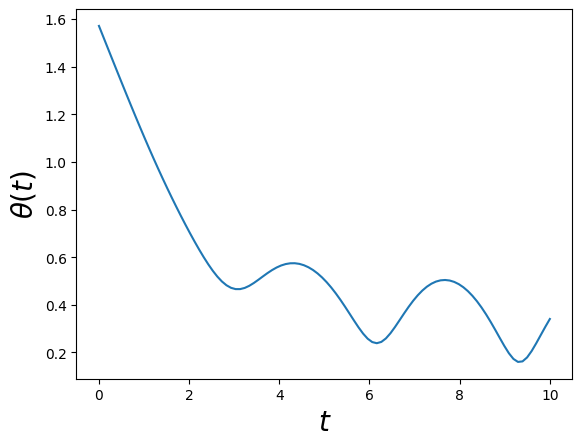

In [63]:
tt = np.linspace(0, 10, 100)
aa = smp.lambdify([t], theta)(tt)
plt.plot(tt, aa)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel(r'$\theta(t)$', fontsize = 20)
plt.show()

### Vector Integrals

Note: Will not add the +C

In [64]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [65]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In some cases integral cannot be evaluated symbolically: must solve definite integrals numerically:

In [66]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3 + t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [67]:
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

### Arclength
$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare cases can be done symbolically. Find the arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [68]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0, 1))

asinh(2)/4 + sqrt(5)/2

In most cases needs to be done numerically. Find the arclength of $\left< e, \sin(t), t^4 \right>$ from $t=0$ to $t=1$

In [69]:
r = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r_num = smp.lambdify([t], smp.diff(r, t).norm())
quad(r_num, 0, 1)[0]

2.316977146444862

### Other relevant quantities

If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element $ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

* Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$
* Curvature: $\kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|}$,
* Unit normal vector to Curve: $\vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|}$


**Example** Find all these for $\vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right>$

In [70]:
t, a, b, c, = smp.symbols('t a b c', pos = True, real = True)

Define the path

In [72]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

Define the velocity vector $\vec{v}$ and speed $|\vec{v}|$

In [74]:
v = smp.diff(r, t)
v_norm = v.norm()

Get $\vec{T}$, $\kappa$ and $\vec{N}$

In [78]:
T = v/v_norm
kappa = smp.diff(T, t).norm() / v_norm
N = smp.diff(T, t) / smp.diff(T, t).norm()

Can evaluate these quantities or make plots

In [83]:
kappa.subs([(t, 2), (a, 3), (b, 4), (c, 5)]).evalf()

0.00775458595406284

In [86]:
N.subs([(t, 2), (a, 3), (b, 4), (c, 5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

Can also make continuous plots

In [87]:
kappa_num = smp.lambdify([t, a, b, c], kappa)

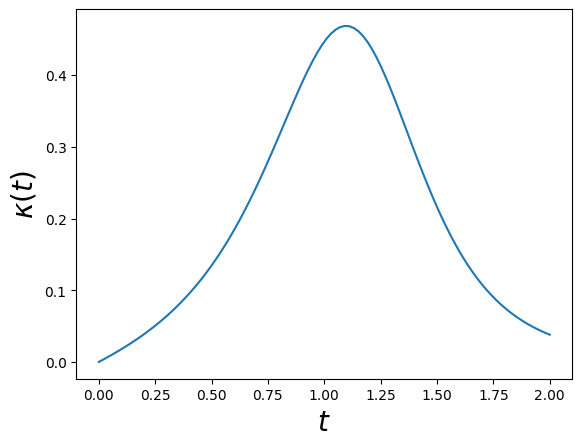

In [88]:
tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
plt.plot(tt, kk)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$\kappa(t)$', fontsize=20)
plt.show()

## Partial / Directional Derivatives

In [89]:
x, y, z = smp.symbols('x y z')

### Basics

Partial Derivatives $\partial{f}/\partial{x}$ and $\partial{f}/\partial{y}$ of $f(x, y) = y^2\sin(x + y)$

In [95]:
f = y**2 * smp. sin(x + y)
smp.diff(f, x)

y**2*cos(x + y)

In [96]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [97]:
smp.diff(f, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

In [99]:
smp.diff(f, x, y, y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [100]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x, y, z, w, v', cls = smp.Function)

* Suppose $x, y$ and $z$ are functions of $t$
* $w$ is a function of $x, y$ and $z$, i.e. $w = w(x, y, z)$

Find $dw/dt$

In [103]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

Can keep things in a more functional form

In [106]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [111]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

In [112]:
w1

x(t)**2 + exp(y(t))*sin(z(t))

### Gradients

Gradients: $\nabla f$. Now we are dealing with particular coordinate systems so we must be careful.

In [113]:
C = CoordSys3D('')

In [118]:
C.x

.x

In [119]:
f = C.x*smp.sin(C.y)

In [120]:
f

.x*sin(.y)

In [121]:
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [122]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [123]:
gradient(f).to_matrix(C).subs([(C.y, 1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

### Directional Derivatives

Directional derivatives $D_uf = \nabla f \cdot u$

In [131]:
u = 4*C.i - 3*C.j + 2*C.k
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [132]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

## Extreme Values and Saddle Points

Extreme values of $f(x, y)$ can occur at

1. Boundary points on the domain of $f$
2. Critical points $(f_x = f_y = 0)$

If

(i) $f_{xx}<0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local maximum** \
(ii) $f_{xx}>0$ and $f_{xx}f_{yy} - f_{xy}^2>0$ at (a,b) then **local minimum** \
(iii) $f_{xx}f_{yy} - f_{xy}^2 < 0$ at (a,b) then **saddle point** \
(iv) $f_{xx}f_{yy} - f_{xy}^2 = 0$ at (a,b) then **inconclusive**

In [133]:
x, y = smp.symbols('x, y', real = True)
f = x**3 + 3*x*y + y**3
f

x**3 + 3*x*y + y**3

In [136]:
smp.solve([smp.diff(f, x), smp.diff(f, y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [137]:
fxx = smp.diff(f, x, x)
fyy = smp.diff(f, y, y)
fxy = smp.diff(f, x, y)

In [138]:
fxx

6*x

Test the first point

In [139]:
fxx.subs([(x, -1), (y, -1)])

-6

In [140]:
test = fxx*fyy-fxy**2
test.subs([(x, -1), (y, -1)])

27

Thus the first point is a local maximum

## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [141]:
x, y, z = smp.symbols('x y z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

But most of the time they need to be done numerically, such as in this example:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xe^{-y}\cos(z)dzdydx$$

In [143]:
# Wont Run!!
# x, y, z = smp.symbols('x, y, z')
# f = x*smp.exp(-y)*smp.cos(z)
# smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

Use scipy to evaluate this numerically

In [145]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z) # z integrated first
tplquad(f, 0, 1,
        lambda x: 0, lambda x: 1-x**2,
        lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

## Integrals and Vector Fields

### Line Integrals (Scalar)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $f(x,y,z)$ along the curve is\,

$$\int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt$$

In [146]:
t = smp.symbols('t', real=True)
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x,y,z)

In [147]:
r

Matrix([
[x(t)],
[y(t)],
[z(t)]])

In [148]:
f

f(x(t), y(t), z(t))

In [152]:
smp.diff(r, t)

Matrix([
[Derivative(x(t), t)],
[Derivative(y(t), t)],
[Derivative(z(t), t)]])

In [153]:
smp.diff(r, t).norm()

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)

In [155]:
integrand = f*smp.diff(r, t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

Suppose

* $\vec{r}(t) = \left< \cos(t), \sin(t), t \right>$
* $f(x, y, z) = 2xy + \sqrt{z}$

and we are going from $t = 0$ to $t = 2\pi$. In this case it can be solved symbolically

In [159]:
integrand1 = integrand.subs([(f, 2*x*y + smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
smp.integrate(integrand1, (t, 0, 2*smp.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In general, can't be done symbolically. Consider now

* $\vec{r}(t) = \left< 3\cos(t), 2\sin(t), e^{t/4} \right>$
* $f(x, y, z) = 2xy + \sqrt{z}$

and we are going from $t = 0$ to $t = 2\pi$.

In [160]:
integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()
# Won't Run!
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [162]:
integrand2

(exp(t/8) + 3*sin(2*t))*sqrt(exp(t/2) + 128*sin(t)**2 + 16)/4

Do it numerically using scipy's `quad` function

In [165]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

21.05530045675979

### Line Integrals (Vector)

Given $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$ the line integral of $\vec{F}(x,y,z)$ along the curve is

$$\int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt$$


In [166]:
t = smp.symbols('t', real=True)
x, y, z, F1, F2, F3 = smp.symbols('x y z F_1, F_2, F_3', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

In [167]:
r

Matrix([
[x(t)],
[y(t)],
[z(t)]])

In [168]:
F

Matrix([
[F_1(x(t), y(t), z(t))],
[F_2(x(t), y(t), z(t))],
[F_3(x(t), y(t), z(t))]])

In [169]:
smp.diff(r, t)

Matrix([
[Derivative(x(t), t)],
[Derivative(y(t), t)],
[Derivative(z(t), t)]])

In [171]:
integrand = F.dot(smp.diff(r, t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

Suppose $\vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right>$ and $\vec{r}(t) = \left<t, t^2, t^4 \right>$ from $t=0$ to $t=1$

In [172]:
integrand1 = integrand.subs([(F1, smp.sqrt(z)),
                             (F2, -2*x),
                             (F3, smp.sqrt(y)),
                             (x, t),
                             (y, t**2),
                             (z, t**4)]).doit().simplify()
integrand1

t**2*(4*t*Abs(t) - 3)

In [173]:
smp.integrate(integrand1, (t, 0, 1))

-1/5

Often times this can't be done by hand, and one needs to evaluate numerically using scipy:

Suppose $\vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right>$ and $\vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right>$ from $t=0$ to $t=2\pi$

In [174]:
integrand2 = integrand.subs([(F1, smp.sqrt(smp.Abs(z))),
                             (F2, -2*x),
                             (F3, smp.sqrt(smp.Abs(y))),
                             (x, 3*smp.cos(t)**2),
                             (y, t**2),
                             (z, 2*smp.sin(t))]).doit().simplify()
# Won't Run
#smp.integrate(integrand2, (t, 0, 2*smp.pi))

In [175]:
integrand2

2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t)

Do it numerically using scipy's `quad` function

In [176]:
integrand2_num = smp.lambdify([t], integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

-118.4352528130723

### Surface Integrals (Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by

$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

The surface integral of a scalar function $G(\vec{r})$ is given by

$$\iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv$$

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. 

Suppose the surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$
   


In [181]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)
r = smp.Matrix([x, y, z])

In [183]:
r

Matrix([
[x(\rho, \theta)],
[y(\rho, \theta)],
[z(\rho, \theta)]])

In [185]:
G

G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [187]:
smp.diff(r,rho).cross(smp.diff(r,the)).norm()

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)

In [188]:
integrand = G*smp.diff(r,rho).cross(smp.diff(r,the)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [189]:
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [190]:
smp.integrate(integrand1, (the, 0, 2*smp.pi), (rho, 0, 1))

pi/60 + 5*sqrt(5)*pi/12

As before, if this integral can't be done symbolically, need to use scipy to convert to numerical function.

### Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by

$$\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv$$

This is also know as the flux of the vector field $\vec{G}$ through the surface

2D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$. Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [191]:
rho, the = smp.symbols(r'\rho \theta',pos=True, real=True)
x, y, z, G1, G2, G3 = smp.symbols('x y z G_1, G_2, G_3', cls=smp.Function, real=True)
x = x(rho, the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = smp.Matrix([x, y, z])
G = smp.Matrix([G1, G2, G3])

In [194]:
integrand = G.dot(smp.diff(r,rho).cross(smp.diff(r,the)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [195]:
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*smp.cos(the)),
                             (y, rho*smp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [196]:
smp.integrate(integrand1, (the, 0, smp.pi), (rho, 0, 1))

-4/5

Again, if this could not be done symbolically, one would need to convert the integrand into a numpy function and integrate using scipys quad function, like in previous examples.

### Explicit Sympy Functionality

In [197]:
from sympy.vector import ParametricRegion

Find the mass of a cylinder with radius  and height  centered at origin with density

In [198]:
a, h, r, the, z = smp.symbols(r'a h r \theta z', positive=True)
cylinder = ParametricRegion((r*smp.cos(the), r*smp.sin(the), z),
                    (the, 0, 2*smp.pi), (z, 0, h), (r, 0, a))
vector_integrate(C.x**2 + C.y**2, cylinder)

pi*a**4*h/2

Not necessarily a fan of this functionailty because there is no clear way of converting it into an numerical function if it cannot be computed symbolically. For more see https://docs.sympy.org/latest/modules/vector/vector_integration.html